# Skooldio Marketing Content: Chadchart Facebook Live Analysis

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter

from sklearn import preprocessing

In [3]:
df = pd.read_csv('fb_chadchart_tracking.csv')
df.drop(columns=['live_date', 'live_time'], inplace=True)
df.head()

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district
0,06/30/2022 17:58,Thur,421000,29:33,65900,1600,11600,กิจกรรมส่งท้ายเดือนแห่งความหลากหลาย..,สยาม,ปทุมวัน
1,06/30/2022 16:10,Thur,430000,52:20,68300,2400,15900,ท่องโลกกว้าง สำรวจพื้นที่,โรงเรียนพระมารดานิจจานุเคราะห์,บางกะปิ
2,06/29/2022 17:10,Wed,419000,50:16,47000,1300,11600,เดือนหน้า พร้อมกันแล้วรึยัง เทศกาลภาพยนตร์,ศาลาว่าการกรุงเทพมหานคร,พระนคร
3,06/29/2022 12:25,Wed,783000,8:20,107000,1700,14100,พักเที่ยง…,ศาลาว่าการกรุงเทพมหานคร,พระนคร
4,06/28/2022 19:33,Tue,564000,16:55,82100,2200,11900,หัวยขวาง,คลองนาทอง,ห้วยขวาง


In [4]:
df.shape[0]

111

In [5]:
df['live_duration_sec'] = np.array([0]*df.shape[0])
df['hour_start'] = np.array([0]*df.shape[0])
df['hour_end'] = np.array([0]*df.shape[0])
df['day_month'] = np.array([0]*df.shape[0])
df.head()

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
0,06/30/2022 17:58,Thur,421000,29:33,65900,1600,11600,กิจกรรมส่งท้ายเดือนแห่งความหลากหลาย..,สยาม,ปทุมวัน,0,0,0,0
1,06/30/2022 16:10,Thur,430000,52:20,68300,2400,15900,ท่องโลกกว้าง สำรวจพื้นที่,โรงเรียนพระมารดานิจจานุเคราะห์,บางกะปิ,0,0,0,0
2,06/29/2022 17:10,Wed,419000,50:16,47000,1300,11600,เดือนหน้า พร้อมกันแล้วรึยัง เทศกาลภาพยนตร์,ศาลาว่าการกรุงเทพมหานคร,พระนคร,0,0,0,0
3,06/29/2022 12:25,Wed,783000,8:20,107000,1700,14100,พักเที่ยง…,ศาลาว่าการกรุงเทพมหานคร,พระนคร,0,0,0,0
4,06/28/2022 19:33,Tue,564000,16:55,82100,2200,11900,หัวยขวาง,คลองนาทอง,ห้วยขวาง,0,0,0,0


In [6]:
for index, row in df.iterrows() :
    # live duration sec
    element = str.split((row['live_duration']), sep=':')
    df['live_duration_sec'][index] = int(element[0])*60 + int(element[1])

    # hour utc
    hour = (str.split(df['timestamp'][index]))[1][:2]
    df['hour_start'][index] = int(hour)

df.head()

C:\Users\patch\AppData\Local\Temp\ipykernel_1732\3135071104.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['live_duration_sec'][index] = int(element[0])*60 + int(element[1])
C:\Users\patch\AppData\Local\Temp\ipykernel_1732\3135071104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_start'][index] = int(hour)


,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
0,06/30/2022 17:58,Thur,421000,29:33,65900,1600,11600,กิจกรรมส่งท้ายเดือนแห่งความหลากหลาย..,สยาม,ปทุมวัน,1773,17,0,0
1,06/30/2022 16:10,Thur,430000,52:20,68300,2400,15900,ท่องโลกกว้าง สำรวจพื้นที่,โรงเรียนพระมารดานิจจานุเคราะห์,บางกะปิ,3140,16,0,0
2,06/29/2022 17:10,Wed,419000,50:16,47000,1300,11600,เดือนหน้า พร้อมกันแล้วรึยัง เทศกาลภาพยนตร์,ศาลาว่าการกรุงเทพมหานคร,พระนคร,3016,17,0,0
3,06/29/2022 12:25,Wed,783000,8:20,107000,1700,14100,พักเที่ยง…,ศาลาว่าการกรุงเทพมหานคร,พระนคร,500,12,0,0
4,06/28/2022 19:33,Tue,564000,16:55,82100,2200,11900,หัวยขวาง,คลองนาทอง,ห้วยขวาง,1015,19,0,0


In [7]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [8]:
top = df['live_view'].sort_values(ascending=False).head()
top

57    9100000
69    4600000
33    4100000
92    2900000
55    2500000
Name: live_view, dtype: int64

In [9]:
df.iloc[list(top.index)]

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
57,2022-06-12 01:03:00,Sun,9100000,10:19,715000,22000,38600,University of Washington Commencement 2022,NaN,NaN,619,1,0,0
69,2022-06-08 06:47:00,Wed,4600000,29:57,412000,11400,28000,รถติดไม่ไหวแล้ว…ต้องตรวจสอบ,ศูนย์ควบคุมและสั่งการจราจร,จตุจักร,1797,6,0,0
33,2022-06-20 15:21:00,Mon,4100000,6:20,500000,6600,20300,พักแล้ว… ทานข้าวด้วยครับ,เจริญสุขโภชนา,ห้วยขวาง,380,15,0,0
92,2022-06-01 12:33:00,Wed,2900000,20:53,304000,6300,18800,มาถึงแล้ว… ศาลาว่าการกรุงเทพมหานคร กับ ชัชชาติ...,ศาลาว่าการกรุงเทพมหานคร,พระนคร,1253,12,0,0
55,2022-06-12 22:51:00,Sun,2500000,35:57,257000,6300,21500,Live from Pike Place,NaN,NaN,2157,22,0,0


<AxesSubplot:>

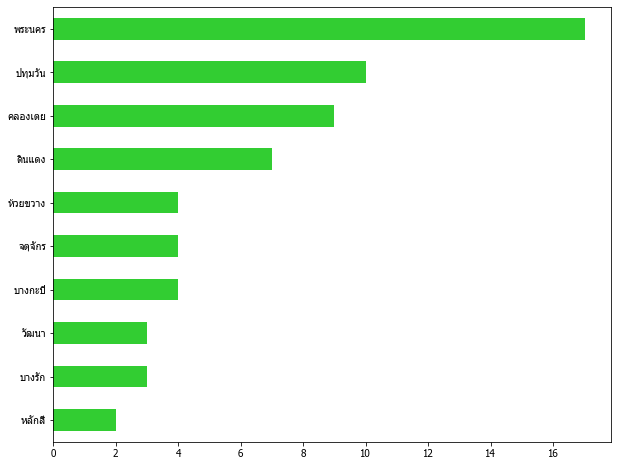

In [10]:
plt.rcParams['font.family'] = 'tahoma'
df['district'].value_counts().head(10).sort_values(ascending=True).plot(kind='barh', color='limegreen', figsize=(10,8))

In [11]:
df['district'].value_counts()

พระนคร         17
ปทุมวัน        10
คลองเตย         9
ดินแดง          7
บางกะปิ         4
จตุจักร         4
ห้วยขวาง        4
บางรัก          3
วัฒนา           3
หลักสี่         2
หนองแขม         2
สาทร            2
ประเวศ          1
วังทองหลาง      1
ทองหล่อ         1
บึงกุ่ม         1
ดุสิต           1
บางพลัด         1
บางเขน          1
ยานนาวา         1
ราชเทวี         1
บางคอแหลม       1
บางกอกใหญ่      1
สัมพันธวงศ์     1
บางซื่อ         1
สายไหม          1
ดอนเมือง        1
ธนบุรี          1
Name: district, dtype: int64

In [12]:
df['district'].unique()

array(['ปทุมวัน', 'บางกะปิ', 'พระนคร', 'ห้วยขวาง', 'ดินแดง', 'ทองหล่อ',
       nan, 'สาทร', 'หนองแขม', 'วัฒนา', 'ราชเทวี', 'บางพลัด', 'คลองเตย',
       'ประเวศ', 'วังทองหลาง', 'จตุจักร', 'บึงกุ่ม', 'ดุสิต', 'บางรัก',
       'บางเขน', 'ยานนาวา', 'หลักสี่', 'บางคอแหลม', 'บางกอกใหญ่',
       'สัมพันธวงศ์', 'บางซื่อ', 'สายไหม', 'ดอนเมือง', 'ธนบุรี'],
      dtype=object)

In [13]:
outlier = df.loc[df['live_view'] == df['live_view'].max()].index
outlier

Int64Index([57], dtype='int64')

In [14]:
date_time = df['timestamp'].astype(str)
date_time

0      2022-06-30 17:58:00
1      2022-06-30 16:10:00
2      2022-06-29 17:10:00
3      2022-06-29 12:25:00
4      2022-06-28 19:33:00
              ...         
106    2022-05-25 14:25:00
107    2022-05-24 14:21:00
108    2022-05-24 10:58:00
109    2022-05-23 17:19:00
110    2022-05-23 14:36:00
Name: timestamp, Length: 111, dtype: object

In [15]:
for index, row in df.iterrows():
    df['day_month'][index] = str(date_time[index][5:10])
df.head()

C:\Users\patch\AppData\Local\Temp\ipykernel_1732\3866559709.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['day_month'][index] = str(date_time[index][5:10])
c:\Users\patch\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
0,2022-06-30 17:58:00,Thur,421000,29:33,65900,1600,11600,กิจกรรมส่งท้ายเดือนแห่งความหลากหลาย..,สยาม,ปทุมวัน,1773,17,0,06-30
1,2022-06-30 16:10:00,Thur,430000,52:20,68300,2400,15900,ท่องโลกกว้าง สำรวจพื้นที่,โรงเรียนพระมารดานิจจานุเคราะห์,บางกะปิ,3140,16,0,06-30
2,2022-06-29 17:10:00,Wed,419000,50:16,47000,1300,11600,เดือนหน้า พร้อมกันแล้วรึยัง เทศกาลภาพยนตร์,ศาลาว่าการกรุงเทพมหานคร,พระนคร,3016,17,0,06-29
3,2022-06-29 12:25:00,Wed,783000,8:20,107000,1700,14100,พักเที่ยง…,ศาลาว่าการกรุงเทพมหานคร,พระนคร,500,12,0,06-29
4,2022-06-28 19:33:00,Tue,564000,16:55,82100,2200,11900,หัวยขวาง,คลองนาทอง,ห้วยขวาง,1015,19,0,06-28


In [16]:
# heat_df = df.groupby(['hour_start', 'day'])
heat_df = df.groupby(['hour_start', 'day_in_week'])

In [17]:
heat = heat_df.count()
heat.head()

timestamp  live_view  live_duration  post_like  \
hour_start day_in_week                                                   
1          Fri                  1          1              1          1   
           Sun                  1          1              1          1   
4          Sat                  1          1              1          1   
           Sun                  1          1              1          1   
           Thur                 1          1              1          1   

                        post_share  post_comment  caption  place  district  \
hour_start day_in_week                                                       
1          Fri                   1             1        1      0         0   
           Sun                   1             1        1      0         0   
4          Sat                   1             1        1      0         0   
           Sun                   1             1        1      1         1   
           Thur                  1             1        1      1         1   

                        live_duration_sec  hour_end  day_month  
hour_start day_in_week                                          
1          Fri                          1         1          1  
           Sun                          1         1          1  
4          Sat                          1         1          1  
           Sun                          1         1          1  
           Thur                         1         1          1

In [18]:
heat_pivot = heat.reset_index().pivot(index='hour_start', columns='day_in_week', values='live_view')
heat_pivot.iloc[:10,:10] # peak a result

day_in_week,Fri,Mon,Sat,Sun,Thur,Tue,Wed
hour_start,,,,,,,
1,1.0,NaN,NaN,1.0,NaN,NaN,NaN
4,NaN,NaN,1.0,1.0,1.0,NaN,NaN
5,NaN,1.0,1.0,1.0,NaN,1.0,NaN
6,NaN,NaN,1.0,NaN,1.0,1.0,3.0
7,NaN,NaN,NaN,1.0,2.0,2.0,NaN
8,NaN,1.0,1.0,2.0,NaN,NaN,1.0
9,1.0,NaN,2.0,NaN,NaN,NaN,NaN
10,1.0,NaN,1.0,NaN,NaN,1.0,NaN
11,NaN,1.0,NaN,1.0,NaN,NaN,1.0


In [19]:
heat_pivot.fillna(0, inplace=True)
heat_pivot = heat_pivot.reindex(range(0, 24), axis=0, fill_value=0)
heat_pivot = heat_pivot.transpose()
day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
heat_pivot = heat_pivot.reindex(index=day)

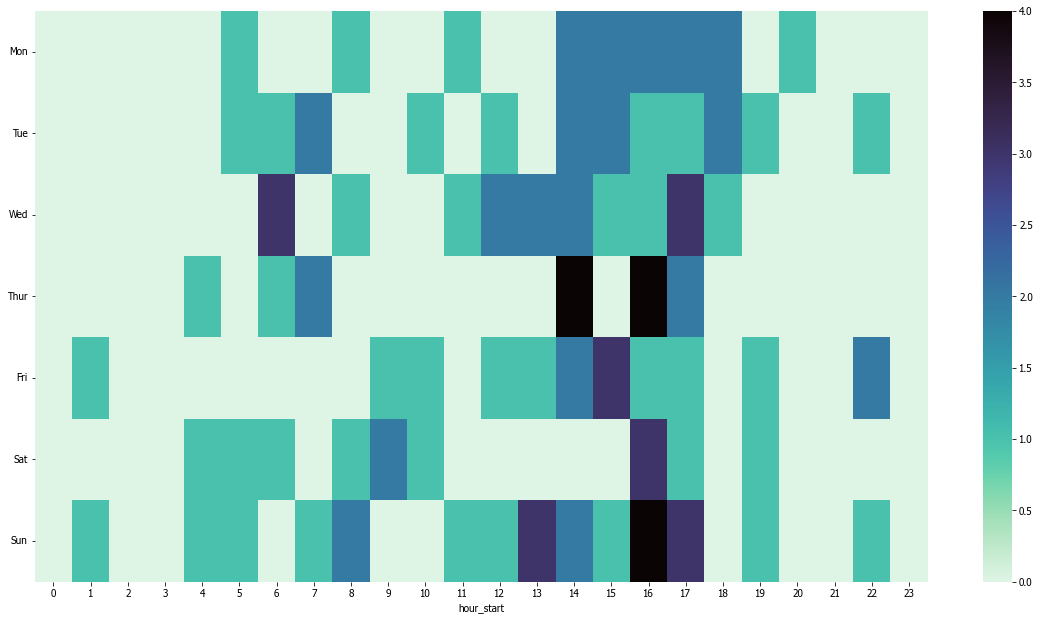

In [20]:
fig, ax = plt.subplots()

sns.heatmap(heat_pivot, cmap='mako_r')
# https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

plt.ylabel('')
plt.yticks(rotation=0)
fig.set_size_inches(20, 10.5)

    Heatmap hour start

In [21]:
heat_df = df.groupby(['hour_start', 'day_month'])
heat = heat_df.count()

heat_pivot = heat.reset_index().pivot(index='day_month', columns='hour_start', values='live_view')
heat_pivot = heat_pivot.reindex(range(24), axis=1)

# heat_pivot # peak a result

# heat_pivot.fillna(0, inplace=True)
# heat_pivot = heat_pivot.reindex(range(1, 24), axis=0, fill_value=0)

# day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
# heat_pivot = heat_pivot.reindex(index=day)
heat_pivot

hour_start,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_month,,,,,,,,,,,,,,,,,,,,,
05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
ytick = np.unique(df['day_month'])
ytick

array(['05-23', '05-24', '05-25', '05-26', '05-27', '05-28', '05-29',
       '05-30', '05-31', '06-01', '06-02', '06-03', '06-04', '06-05',
       '06-06', '06-07', '06-08', '06-09', '06-10', '06-11', '06-12',
       '06-13', '06-14', '06-15', '06-16', '06-17', '06-18', '06-19',
       '06-20', '06-21', '06-22', '06-23', '06-24', '06-25', '06-26',
       '06-27', '06-28', '06-29', '06-30'], dtype=object)

In [23]:
sns.set_style('dark')

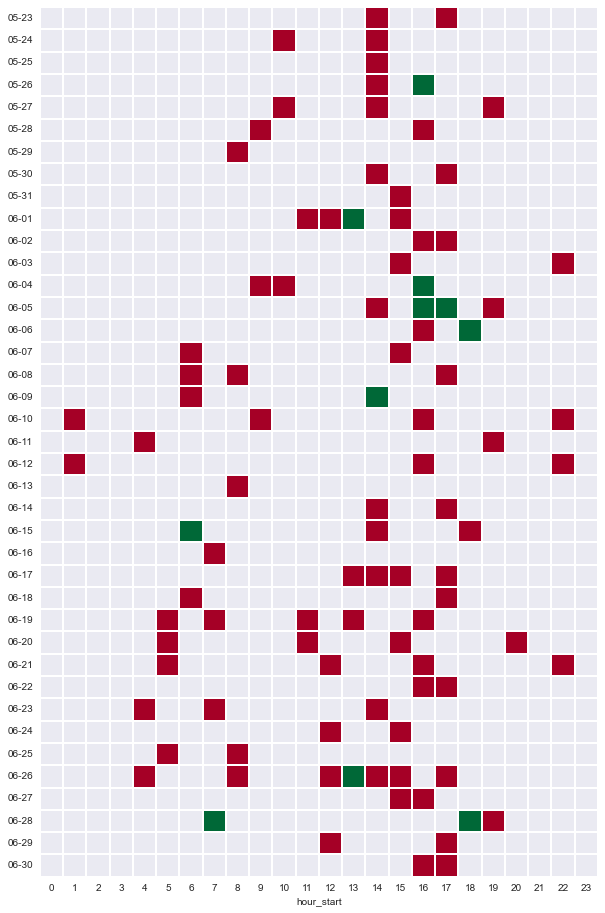

In [24]:
fig, ax = plt.subplots()

sns.heatmap(heat_pivot, yticklabels=ytick, linewidths=2, cmap='RdYlGn', cbar=False)
# https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

plt.ylabel('')
plt.yticks(rotation=0)
fig.set_size_inches(10, 16)

    Heatmap hour end

> calculate and fill value in hour_end column

In [25]:
for index, row in df.iterrows():
    minute = df['live_duration_sec'][index] // 60
    hour = minute // 60
    if hour == 0 :
        df['hour_end'][index] = df['hour_start'][index]
    else :
        df['hour_end'][index] = df['hour_start'][index] + int(hour)

C:\Users\patch\AppData\Local\Temp\ipykernel_1732\1572578337.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_end'][index] = df['hour_start'][index]
C:\Users\patch\AppData\Local\Temp\ipykernel_1732\1572578337.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['hour_end'][index] = df['hour_start'][index] + int(hour)


In [26]:
heat_df = df.groupby(['hour_end', 'day_month'])
heat = heat_df.count()

heat_pivot = heat.reset_index().pivot(index='day_month', columns='hour_end', values='live_view')
heat_pivot = heat_pivot.reindex(range(24), axis=1)

# heat_pivot # peak a result

# heat_pivot.fillna(0, inplace=True)
# heat_pivot = heat_pivot.reindex(range(1, 24), axis=0, fill_value=0)

# day = ['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun']
# heat_pivot = heat_pivot.reindex(index=day)
heat_pivot

hour_end,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day_month,,,,,,,,,,,,,,,,,,,,,
05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
05-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
05-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
05-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
05-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


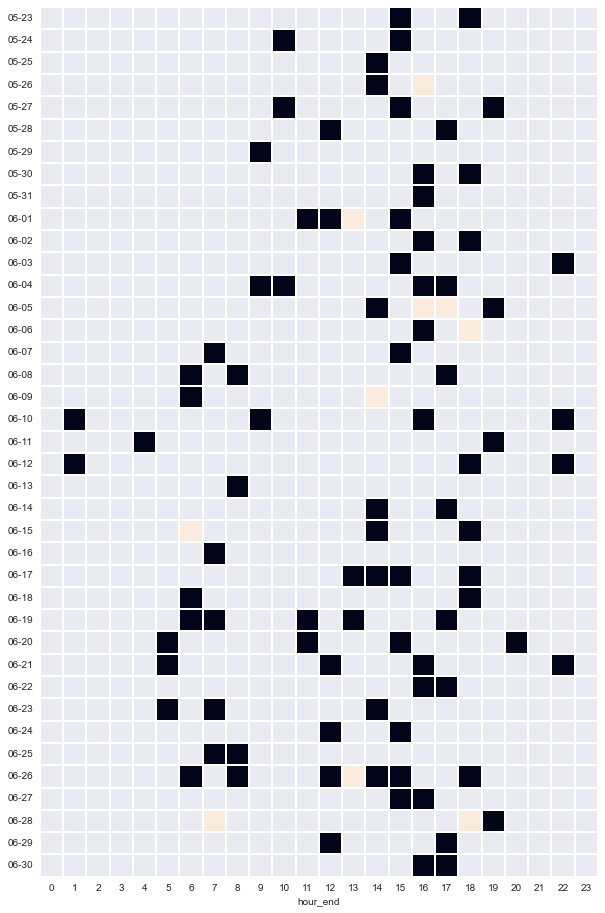

In [27]:
fig, ax = plt.subplots()

sns.heatmap(heat_pivot, yticklabels=ytick, linewidths=2, cmap='rocket', cbar=False)
# https://stackabuse.com/ultimate-guide-to-heatmaps-in-seaborn-with-python/

plt.ylabel('')
plt.yticks(rotation=0)
fig.set_size_inches(10, 16)

Text(0.5, 0, 'Day in a Week')

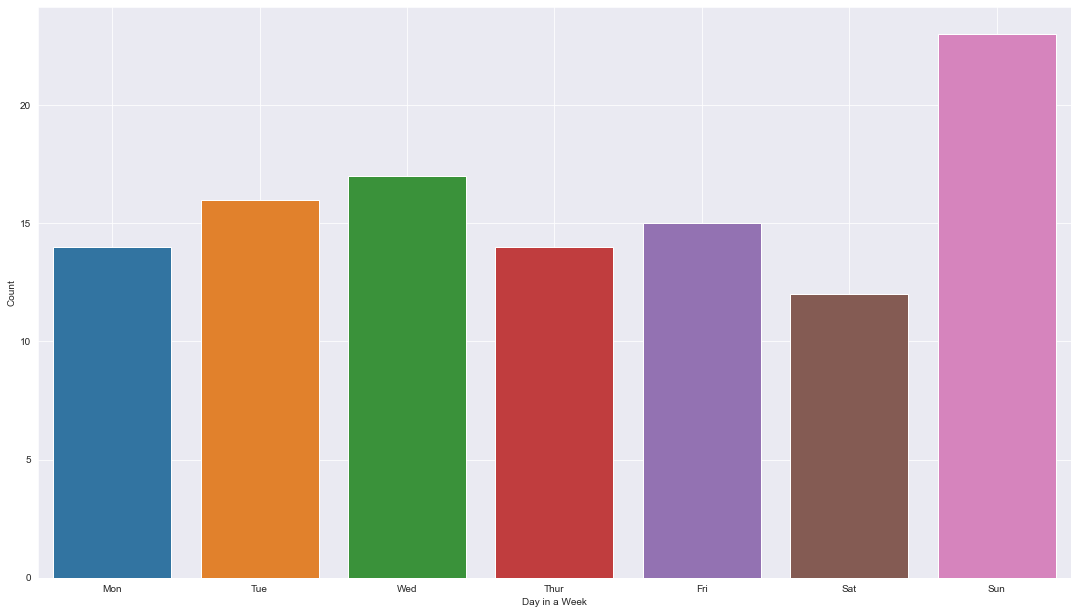

In [28]:
fig, ax = plt.subplots()

sns.countplot(x= 'day_in_week', data=df, order=['Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat', 'Sun'])
fig.set_size_inches(18.5, 10.5)
plt.grid()

plt.ylabel('Count')
plt.xlabel('Day in a Week')

In [29]:
df['hour_start'].mean()

13.108108108108109

In [55]:
df['day_month'].value_counts().mean()

2.8461538461538463

In [30]:
plt.rcParams['font.family'] = 'DejaVu Sans'
# return to normal font

stat

In [31]:
# return as index
max_like = df['post_like'].max()
max_share = df['post_share'].max()
max_comment = df['post_comment'].max()

min_like = df['post_like'].min()
min_share = df['post_share'].min()
min_comment = df['post_comment'].min()

avg_like = df['post_like'].mean()
avg_share = df['post_share'].mean()
avg_comment = df['post_comment'].mean()
avg_view = df['live_view'].mean()

max_duration = df['live_duration_sec'].max()
avg_duration = df['live_duration_sec'].mean()
min_duration = df['live_duration_sec'].min()

In [32]:
print(
    "max_like = " + str(max_like) + "\n"
    "max_share = " + str(max_share) + "\n"
    "max_comment = " + str(max_comment) + "\n"
    "max_duration = " + str(max_duration) + " s\n"
    "\n"
    "min_like = " + str(min_like) + "\n"
    "min_share = " + str(min_share) + "\n"
    "min_comment = " + str(min_comment) + "\n"
    "min_duration = " + str(min_duration) + " s\n"
    "\n"
    "avg_like = " + str(avg_like) + "\n"
    "avg_share = " + str(avg_share) + "\n"
    "avg_comment = " + str(avg_comment) + "\n"
    "avg_duration = " + str(avg_duration.round(2)) + " s\n"
    "avg_view = " + str(avg_view.round(2)) 
)

max_like = 715000
max_share = 22000
max_comment = 44700
max_duration = 10924 s

min_like = 28800
min_share = 352
min_comment = 2200
min_duration = 60 s

avg_like = 119263.96396396396
avg_share = 3276.990990990991
avg_comment = 14316.216216216217
avg_duration = 2376.76 s
avg_view = 988612.61


In [33]:
avg_duration // 60

39.0

In [34]:
avg_duration % 60

36.75675675675666

In [35]:
live_sum = df['live_duration_sec'].sum()
live_sum

263820

In [36]:
print('hour: ', str((live_sum // 60) // 60))
print('min: ', str((live_sum // 60) % 60))
print('sec: ', str(live_sum % 60))

hour:  73
min:  17
sec:  0


In [37]:
time_per_day = df.groupby(['day_month'])
t = time_per_day['live_duration_sec'].sum().mean()

print('hour: ', str((t // 60) // 60))
print('min: ', str((t // 60) % 60))
print('sec: ', str(t % 60))

hour:  1.0
min:  52.0
sec:  44.615384615384755


In [38]:
df['day_month'].unique().shape

(39,)

In [39]:
df.loc[df['live_view'] == df['live_view'].max()] # also maximun likes

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
57,2022-06-12 01:03:00,Sun,9100000,10:19,715000,22000,38600,University of Washington Commencement 2022,NaN,NaN,619,1,1,06-12


In [40]:
df['live_view'].sort_values(ascending=False).head()

57    9100000
69    4600000
33    4100000
92    2900000
55    2500000
Name: live_view, dtype: int64

In [41]:
df.iloc[[46, 58, 81, 22, 44], :]

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
46,2022-06-17 17:13:00,Fri,938000,86:45,161000,5800,36200,อากาศยามเช้า…,ลานคนเมือง,พระนคร,5205,17,18,06-17
58,2022-06-11 19:55:00,Sat,2200000,9:12,246000,4400,16100,วิ่งจ็อกกิ้งสวนแก๊ส,NaN,NaN,552,19,19,06-11
81,2022-06-04 16:55:00,Sat,846000,86:23,84600,4400,17000,ชวนมาสวนเพลินๆ ดนตรีไพเราะ (ต่อ),NaN,NaN,5183,16,17,06-04
22,2022-06-24 12:48:00,Fri,515000,40:24,70200,2000,10900,พูดคุยกับอาจารย์ชัชชาติ ณ ธรรมศาสตร์ (ท่าพระจั...,ธรรมศาสตร์ (ท่าพระจันทร์),พระนคร,2424,12,12,06-24
44,2022-06-17 14:44:00,Fri,256000,1:00,38800,453,2300,วาร์ปมาแล้ววว,สภาหอการค้าไทย,พระนคร,60,14,14,06-17


In [42]:
df.loc[df['live_duration_sec'] == df['live_duration_sec'].max()]

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
99,2022-05-28 09:07:00,Sat,1400000,182:04,148000,7400,38200,แอบกลับมาหา…. แยกท่าพระ,ท่าพระ,บางกอกใหญ่,10924,9,12,05-28


In [43]:
df.loc[df['live_duration_sec'] == df['live_duration_sec'].min()]

,timestamp,day_in_week,live_view,live_duration,post_like,post_share,post_comment,caption,place,district,live_duration_sec,hour_start,hour_end,day_month
44,2022-06-17 14:44:00,Fri,256000,1:00,38800,453,2300,วาร์ปมาแล้ววว,สภาหอการค้าไทย,พระนคร,60,14,14,06-17


In [44]:
df['live_view'].sum()

109736000

Visualization

In [45]:
sns.set_style('dark')

def millions(x, pos):
    'The two args are the value and tick position'
    return '%10.0dM' % (x*1e-6)

def hundred_thousand(x, pos):
    'The two args are the value and tick position'
    return '%10.0d00K' % (x*1e-5)

formatter1 = FuncFormatter(millions)
formatter2 = FuncFormatter(hundred_thousand)

# custom suffix yticks: https://matplotlib.org/2.0.2/examples/pylab_examples/custom_ticker1.html
# formatting: https://thepythonguru.com/python-string-formatting/

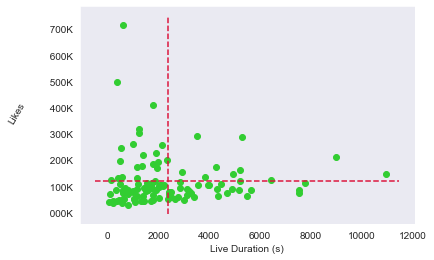

In [46]:
x = np.array(df['live_duration_sec'])
y = np.array(df['post_like'])

fig, ax = plt.subplots()

plt.scatter(x, y, color='limegreen')

xmin, xmax, ymin, ymax = plt.axis()

plt.vlines(df['live_duration_sec'].mean(), ymin=ymin, ymax=ymax, linestyles='dashed', colors=['crimson'])
plt.hlines(df['post_like'].mean(), xmin=xmin, xmax=xmax, linestyles='dashed', colors=['crimson'])

# plt.grid(True)
plt.xlabel("Live Duration (s)")
plt.ylabel("Likes", rotation=60)
ax.yaxis.set_major_formatter(formatter2)

In [47]:

###
# x = np.array(df['live_duration_sec'], dtype=np.int32)
# y = np.array(df['post_share'], dtype=np.int32)
# ax = plt.scatter(x, y, color='forestgreen')

# xmin, xmax, ymin, ymax = plt.axis()

# plt.vlines(df['live_duration_sec'].mean(), ymin=ymin, ymax=ymax, linestyles='dashed', colors=['crimson'])
# plt.hlines(df['post_share'].mean(), xmin=xmin, xmax=xmax, linestyles='dashed', colors=['crimson'])

# plt.grid(True)
# plt.xlabel("Live Duration (s)")
# plt.ylabel("Shares", rotation=60)
###

In [48]:
###
# x = np.array(df['live_duration_sec'], dtype=np.int32)
# y = np.array(df['live_view'], dtype=np.int32)
# ax = plt.scatter(x, y, color='mediumseagreen')

# xmin, xmax, ymin, ymax = plt.axis()

# plt.vlines(df['live_duration_sec'].mean(), ymin=ymin, ymax=ymax, linestyles='dashed', colors=['crimson'])
# plt.hlines(df['live_view'].mean(), xmin=xmin, xmax=xmax, linestyles='dashed', colors=['crimson'])

# plt.grid(True)
# plt.xlabel("Live Duration (s)")
# plt.ylabel("Views", rotation=60)
# plt.ticklabel_format(axis='y', style='plain')
###

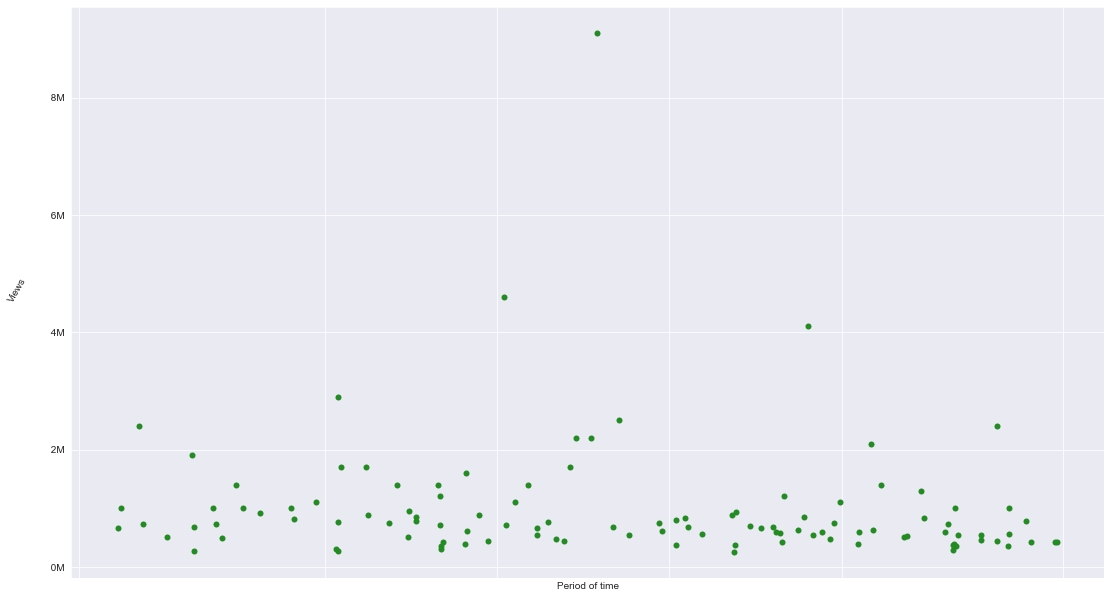

In [49]:
x = df['timestamp']

fig, ax = plt.subplots()

# plt.plot(x, df['live_view'], color='forestgreen', linewidth=1) # /1000
plt.scatter(x, df['live_view'], color='forestgreen', linewidth=0.01) # /1000
# plt.plot(x, df['post_like']/100, color='red')
# plt.plot(x, df['post_share']/10, color='blue')
# plt.plot(x, df['post_comment']/10, color = 'salmon')
# plt.plot(x, df['live_duration_sec']/10, color = 'gold')
# plt.fill_between(x, df['live_view'], color='limegreen', alpha = 0.5)

plt.tick_params(labelbottom=False)
plt.ticklabel_format(axis='y', style='plain')

# plt.title('Views over time')
plt.xlabel('Period of time')
plt.ylabel('Views', rotation = 60)
plt.grid(True)
ax.yaxis.set_major_formatter(formatter1)

fig.set_size_inches(18.5, 10.5)
plt.show()

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5]),
 [Text(0.5, 0, 'live_view'),
  Text(1.5, 0, 'post_like'),
  Text(2.5, 0, 'post_share'),
  Text(3.5, 0, 'post_comment'),
  Text(4.5, 0, 'live_duration_sec'),
  Text(5.5, 0, 'hour_end')])

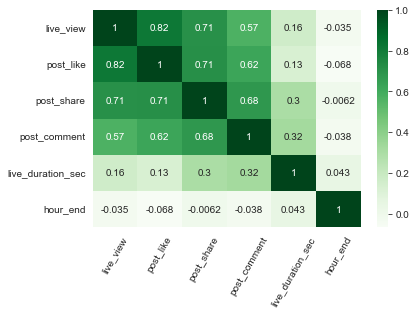

In [50]:
sns.heatmap(df.drop(columns=['hour_start']).corr(method='kendall'), cmap='Greens', annot=True)
plt.xticks(rotation=60)

# plt.title('Correlation Heatmap')

In [51]:
min_max_scaler = preprocessing.MinMaxScaler()

df_box = df[['live_view', 'post_like', 'post_share', 'post_comment', 'live_duration_sec']]
df_box_scaled = pd.DataFrame(min_max_scaler.fit_transform(df_box))
df_box_scaled.columns = ['live_view', 'post_like', 'post_share', 'post_comment', 'live_duration_sec']
df_box_scaled

,live_view,post_like,post_share,post_comment,live_duration_sec
0,0.018657,0.054066,0.057650,0.221176,0.157677
1,0.019674,0.057563,0.094605,0.322353,0.283505
2,0.018431,0.026523,0.043792,0.221176,0.272091
3,0.059588,0.113961,0.062269,0.280000,0.040501
4,0.034826,0.077674,0.085366,0.228235,0.087905
...,...,...,...,...,...
106,0.028042,0.043865,0.089985,0.148235,0.217139
107,0.054274,0.051006,0.094605,0.202353,0.500552
108,0.242424,0.338385,0.371766,0.411765,0.087077
109,0.084125,0.134363,0.177753,0.268235,0.475239


Text(0, 0.5, 'Normalized Values')

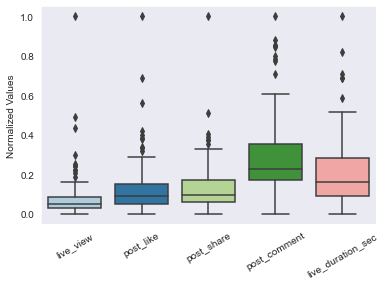

In [52]:
sns.boxplot(data=df_box_scaled, palette='Paired')
plt.xticks(rotation=30)
plt.ylabel('Normalized Values')

Text(0, 0.5, 'Normalized Values')

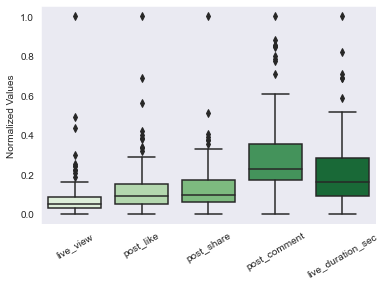

In [53]:
sns.boxplot(data=df_box_scaled, palette='Greens')
plt.xticks(rotation=30)
plt.ylabel('Normalized Values')

---